In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import seaborn as sns
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import keras

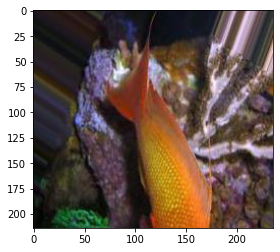

In [2]:
img=image.imread("../input/fish-species/Species/Test_Set/Anthias anthias/anthias_anthias-1700.jpg")
plt.imshow(img)

In [3]:
train_gen = ImageDataGenerator(featurewise_center= True,
                               width_shift_range=0.05,
                               height_shift_range=0.05,
                               shear_range=0.05,
                              zoom_range=0.05,
                               horizontal_flip=True,
                               vertical_flip=True,
                               preprocessing_function=preprocess_input)
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [4]:
train_path="../input/fish-species/Species/Training_Set"
test_path="../input/fish-species/Species/Test_Set"

train_data=train_gen.flow_from_directory(train_path,
                                        target_size=(200,200),
                                        batch_size=300,
                                        class_mode="categorical"
                                        )                                        

val_data=test_gen.flow_from_directory(test_path,
                                        target_size=(200,200),
                                        batch_size=300,
                                        class_mode="categorical"
                                        )

Found 34000 images belonging to 20 classes.
Found 6000 images belonging to 20 classes.


In [5]:
base_model = InceptionV3(input_shape=(200,200,3), include_top= False)

2022-03-16 11:40:31.690787: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-16 11:40:31.785066: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-16 11:40:31.785812: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-16 11:40:31.787013: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

87924736/87910968 [==============================] - 0s 0us/step


In [6]:
for layer in base_model.layers:
    layer.trainable = False

In [7]:
X = Flatten()(base_model.output)
X = Dense(units=20, activation='sigmoid')(X)
model = Model(base_model.input, X)
model.compile(optimizer='adam', loss = keras.losses.binary_crossentropy, metrics=['accuracy'])
model.summary

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7f349550bf90>>

In [8]:
train_data.class_indices

{'Anthias anthias': 0,
 'Atherinomorus lacunosus': 1,
 'Belone belone': 2,
 'Boops boops': 3,
 'Chlorophthalmus agassizi': 4,
 'Coris julis': 5,
 'Dasyatis centroura': 6,
 'Epinephelus caninus': 7,
 'Gobius niger': 8,
 'Mugil cephalus': 9,
 'Phycis phycis': 10,
 'Polyprion americanus': 11,
 'Pseudocaranx dentex': 12,
 'Rhinobatos cemiculus': 13,
 'Scomber japonicus': 14,
 'Solea solea': 15,
 'Squalus acanthias': 16,
 'Tetrapturus belone': 17,
 'Trachinus draco': 18,
 'Trigloporus lastoviza': 19}

In [9]:
t_img , label = train_data.next()

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [10]:
def plotImages(img_arr, label):
    for idx ,img in enumerate(img_arr):
        if idx <= 10:
            plt.figure(figsize=(5,5))
            plt.imshow(img)
            plt.title(img.shape)
            plt.axis=False
            plt.show()

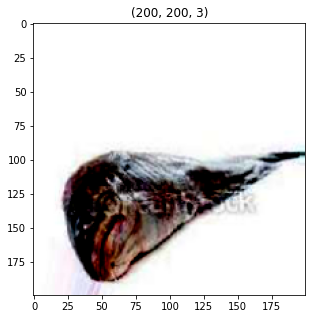

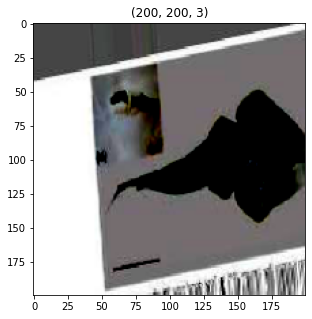

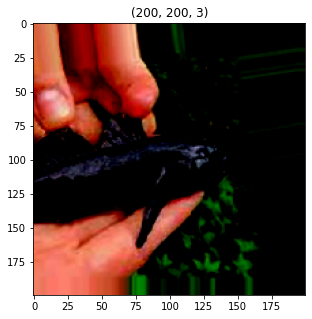

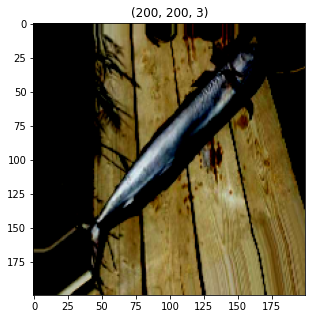

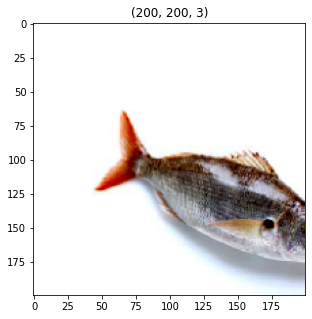

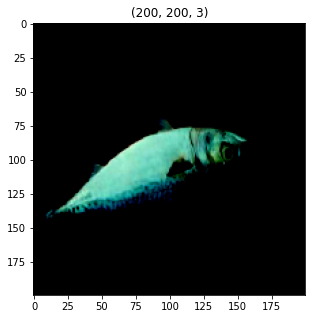

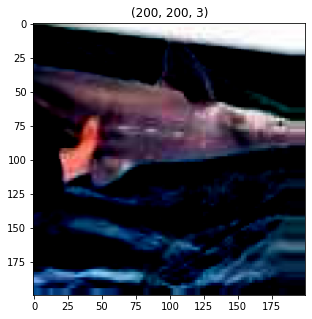

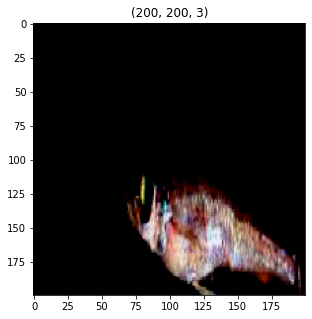

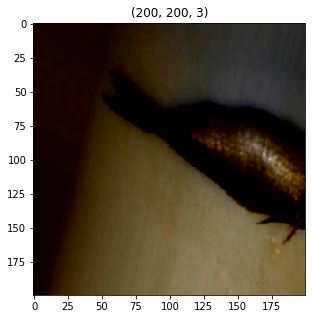

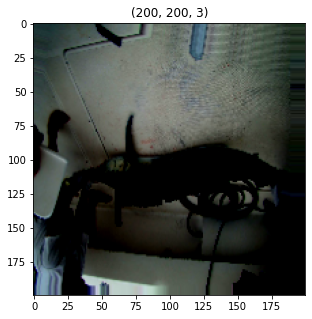

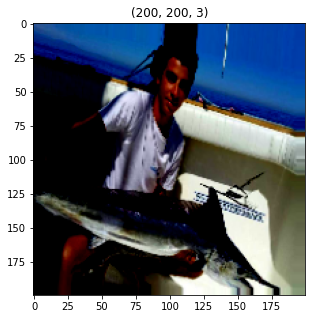

In [11]:
plotImages(t_img, label)

In [12]:
from keras.callbacks import ModelCheckpoint , EarlyStopping
mc = ModelCheckpoint(filepath = "./best_model.h5",
                    mointor='accuracy',
                    verbose=1,
                    save_best_only=True)
es = EarlyStopping(monitor= "accuracy", min_delta=0.01, patience=5,
                  verbose=1)
cb = [mc,es]

In [13]:
history = model.fit(
    train_data,
    batch_size=300,
    epochs=10,
    validation_data=val_data,
)

2022-03-16 11:40:49.618906: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-03-16 11:40:59.328302: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


 42/114 [==========>...................] - ETA: 5:41 - loss: 0.9156 - accuracy: 0.3287

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


114/114 [==============================] - 623s 5s/step - loss: 0.3898 - accuracy: 0.6120 - val_loss: 0.0558 - val_accuracy: 0.8452
Epoch 2/10


KeyboardInterrupt: 